In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
vvix = pd.read_excel("resource/vvix_data.xlsx")

### Data inspect

In [10]:
vvix.set_index("Date", inplace=True)

In [16]:
vvix = vvix.loc[:"2020-4-15"]

In [37]:
vvix.columns

Index(['SPXT ', 'VIX ', 'SPVXSP ', 'SPVXSTR ', 'SPVXMP ', 'SPVXMTR ', 'UVXY ',
       'UVXY.i', 'SVXY', 'SVXY.i (2x)', '.5 return SVXY', 'ZIV', 'ZIV.i',
       'VXX ', 'VXX.i', 'SLOPE', 'VXXBEN', 'Inverse UVXY', 'VIX 126', 'VVIX',
       'CSFB', 'SKEW', 'CSFB-', 'SLOPE 200 day', 'VXXBEN 200 day',
       'VIX 200 day', '1.5x UVXY', 'SPXT  daily returns', 'VIX  daily returns',
       'SPVXSP  daily returns', 'SPVXSTR  daily returns',
       'SPVXMP  daily returns'],
      dtype='object')

In [38]:
tickers = ['SPXT ', 'VIX ', 'SPVXSP ', 'SPVXSTR ', 'SPVXMP ', 'SPVXMTR ', 'UVXY ']

### Lets get the daily returns for the above features

In [39]:
for t in tickers:
    vvix[f"{t} daily returns"] = vvix[t].pct_change()

/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
vvix["abs_spy_spvxmtr"] = np.abs(vvix["SPXT "] - vvix["SPVXMTR "])

/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
vvix.corr()

,SPXT,VIX,SPVXSP,SPVXSTR,SPVXMP,SPVXMTR,UVXY,UVXY.i,SVXY,SVXY.i (2x),...,VIX 200 day,1.5x UVXY,SPXT daily returns,VIX daily returns,SPVXSP daily returns,SPVXSTR daily returns,SPVXMP daily returns,SPVXMTR daily returns,UVXY daily returns,abs_spy_spvxmtr
SPXT,1.000000,-0.374171,-0.722715,-0.640815,-0.841747,-0.882729,-0.389029,-0.483041,0.149087,0.440934,...,-0.611784,-0.539658,0.014652,0.010281,0.001147,0.004551,-0.017190,-0.011530,0.036329,-0.885515
VIX,-0.374171,1.000000,0.654247,0.612409,0.680203,0.717625,0.381120,0.553942,-0.423011,-0.445047,...,0.595248,0.602238,-0.136593,0.109410,0.146769,0.181232,0.147559,0.152113,0.212329,0.716238
SPVXSP,-0.722715,0.654247,1.000000,0.999137,0.733832,0.724327,0.923674,0.931358,-0.743149,-0.655773,...,0.713706,0.978554,-0.029003,0.000434,0.039274,0.039916,0.055257,0.058330,-0.015234,0.725371
SPVXSTR,-0.640815,0.612409,0.999137,1.000000,0.762767,0.737929,0.913665,0.926255,-0.318155,-0.419696,...,0.745332,0.976983,-0.024463,-0.004696,0.030632,0.023800,0.045624,0.051922,-0.024707,0.738820
SPVXMP,-0.841747,0.680203,0.733832,0.762767,1.000000,0.999269,0.756902,0.561502,-0.371321,-0.607075,...,0.826710,0.653813,-0.016364,-0.005998,0.008452,0.003350,0.036781,0.033448,-0.040411,0.999403
SPVXMTR,-0.882729,0.717625,0.724327,0.737929,0.999269,1.000000,0.781307,0.531986,-0.830860,-0.857987,...,0.825792,0.629703,-0.018055,-0.002412,0.016929,0.016873,0.037485,0.040546,-0.025556,0.999982
UVXY,-0.389029,0.381120,0.923674,0.913665,0.756902,0.781307,1.000000,1.000000,-0.229450,-0.222189,...,0.578665,0.983183,0.029677,-0.022112,-0.023697,-0.017741,-0.010257,-0.016014,-0.014650,0.778614
UVXY.i,-0.483041,0.553942,0.931358,0.926255,0.561502,0.531986,1.000000,1.000000,-0.229450,-0.308142,...,0.595307,0.981055,-0.032756,-0.001577,0.041704,0.033138,0.050143,0.058209,-0.014650,0.533007
SVXY,0.149087,-0.423011,-0.743149,-0.318155,-0.371321,-0.830860,-0.229450,-0.229450,1.000000,0.997903,...,-0.583104,-0.268805,0.013259,0.014327,0.005061,-0.002803,-0.024045,0.006083,-0.017747,-0.832649
SVXY.i (2x),0.440934,-0.445047,-0.655773,-0.419696,-0.607075,-0.857987,-0.222189,-0.308142,0.997903,1.000000,...,-0.517827,-0.350062,0.021612,-0.004468,-0.011024,-0.032314,-0.049717,-0.021850,-0.030803,-0.860130


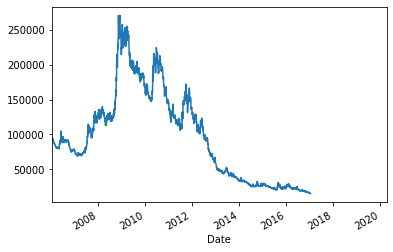

In [62]:
vvix["abs_spy_spvxmtr"].plot()

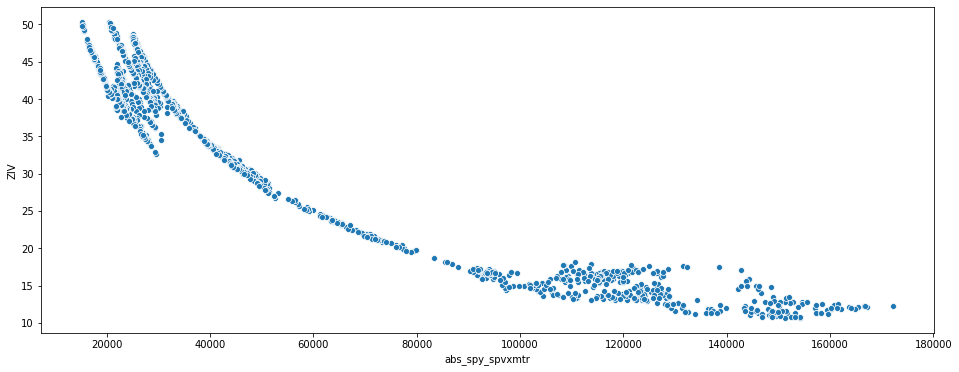

In [60]:
plt.figure(figsize=(16,6))
sns.scatterplot(x = "abs_spy_spvxmtr", y = "ZIV", data=vvix)

In [63]:
vvix["abs_spy_spvxmtr returns"] = vvix["abs_spy_spvxmtr"].pct_change()

/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


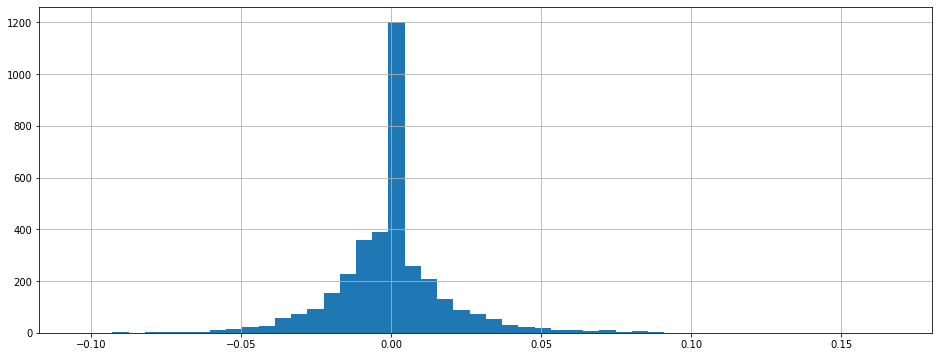

In [67]:
vvix["abs_spy_spvxmtr returns"].hist(figsize =(16,6), bins = 50)

In [68]:
vvix.corr()

,SPXT,VIX,SPVXSP,SPVXSTR,SPVXMP,SPVXMTR,UVXY,UVXY.i,SVXY,SVXY.i (2x),...,1.5x UVXY,SPXT daily returns,VIX daily returns,SPVXSP daily returns,SPVXSTR daily returns,SPVXMP daily returns,SPVXMTR daily returns,UVXY daily returns,abs_spy_spvxmtr,abs_spy_spvxmtr returns
SPXT,1.000000,-0.374171,-0.722715,-0.640815,-0.841747,-0.882729,-0.389029,-0.483041,0.149087,0.440934,...,-0.539658,0.014652,0.010281,0.001147,0.004551,-0.017190,-0.011530,0.036329,-0.885515,-0.011894
VIX,-0.374171,1.000000,0.654247,0.612409,0.680203,0.717625,0.381120,0.553942,-0.423011,-0.445047,...,0.602238,-0.136593,0.109410,0.146769,0.181232,0.147559,0.152113,0.212329,0.716238,0.149100
SPVXSP,-0.722715,0.654247,1.000000,0.999137,0.733832,0.724327,0.923674,0.931358,-0.743149,-0.655773,...,0.978554,-0.029003,0.000434,0.039274,0.039916,0.055257,0.058330,-0.015234,0.725371,0.056355
SPVXSTR,-0.640815,0.612409,0.999137,1.000000,0.762767,0.737929,0.913665,0.926255,-0.318155,-0.419696,...,0.976983,-0.024463,-0.004696,0.030632,0.023800,0.045624,0.051922,-0.024707,0.738820,0.049916
SPVXMP,-0.841747,0.680203,0.733832,0.762767,1.000000,0.999269,0.756902,0.561502,-0.371321,-0.607075,...,0.653813,-0.016364,-0.005998,0.008452,0.003350,0.036781,0.033448,-0.040411,0.999403,0.032752
SPVXMTR,-0.882729,0.717625,0.724327,0.737929,0.999269,1.000000,0.781307,0.531986,-0.830860,-0.857987,...,0.629703,-0.018055,-0.002412,0.016929,0.016873,0.037485,0.040546,-0.025556,0.999982,0.040386
UVXY,-0.389029,0.381120,0.923674,0.913665,0.756902,0.781307,1.000000,1.000000,-0.229450,-0.222189,...,0.983183,0.029677,-0.022112,-0.023697,-0.017741,-0.010257,-0.016014,-0.014650,0.778614,-0.013616
UVXY.i,-0.483041,0.553942,0.931358,0.926255,0.561502,0.531986,1.000000,1.000000,-0.229450,-0.308142,...,0.981055,-0.032756,-0.001577,0.041704,0.033138,0.050143,0.058209,-0.014650,0.533007,0.055421
SVXY,0.149087,-0.423011,-0.743149,-0.318155,-0.371321,-0.830860,-0.229450,-0.229450,1.000000,0.997903,...,-0.268805,0.013259,0.014327,0.005061,-0.002803,-0.024045,0.006083,-0.017747,-0.832649,0.003255
SVXY.i (2x),0.440934,-0.445047,-0.655773,-0.419696,-0.607075,-0.857987,-0.222189,-0.308142,0.997903,1.000000,...,-0.350062,0.021612,-0.004468,-0.011024,-0.032314,-0.049717,-0.021850,-0.030803,-0.860130,-0.022890
